In [4]:
## TFIN605 Data Analytics in Finance


## Mount drive to acces the dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
## Load required packages
import pandas as pd 
import matplotlib.pyplot as plt

In [14]:
## Load dataset using pandas from our drive
dataset = pd.read_excel('/content/drive/MyDrive/debt_maturity_data_2022.xlsx')

# convert dataset to dataframe using pandas
df = pd.DataFrame(dataset)

# print the first 4 columns
df.head(n=4)

# get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148015 entries, 0 to 148014
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ws_num       148015 non-null  object 
 1   year         148015 non-null  int64  
 2   TA           148015 non-null  float64
 3   SALES_USD    148015 non-null  float64
 4   MKT_EQUITY   137376 non-null  float64
 5   BOOK_EQUITY  147944 non-null  float64
 6   ST_DEBT      145422 non-null  float64
 7   LT_DEBT      147329 non-null  float64
 8   NPPE         145236 non-null  float64
 9   INTEREST     143879 non-null  float64
 10  EBIT         143868 non-null  float64
 11  EBITDA       141579 non-null  float64
 12  CASH         143559 non-null  float64
 13  TA_USD       148015 non-null  float64
 14  DIVIDEND     146222 non-null  float64
 15  NATION       148015 non-null  int64  
 16  COUNTRY      148015 non-null  object 
dtypes: float64(13), int64(2), object(2)
memory usage: 19.2+ MB


In [15]:
## reviewing the unique count of values per feature to determine 
# any features can be quickly deleted due to very high or very low variability.

for col in df.columns:
    print(col, df[col].nunique(), len(df))

ws_num 13345 148015
year 21 148015
TA 138036 148015
SALES_USD 129195 148015
MKT_EQUITY 133205 148015
BOOK_EQUITY 129539 148015
ST_DEBT 79139 148015
LT_DEBT 79898 148015
NPPE 110028 148015
INTEREST 47498 148015
EBIT 102773 148015
EBITDA 104884 148015
CASH 103476 148015
TA_USD 134079 148015
DIVIDEND 53267 148015
NATION 4 148015
COUNTRY 4 148015


In [16]:
### High or low variability of values in features
## We can safely remove “SALES_USD”, “MKT_EQUITY”, “BOOK_EQUITY” , “TA” 
# since most if not all, values are unique for each feature.

df.drop(['SALES_USD'], axis=1, inplace=True)
df.drop(['MKT_EQUITY'], axis=1, inplace=True)
df.drop(['BOOK_EQUITY'], axis=1, inplace=True)
df.drop(['TA'], axis=1, inplace=True)


In [18]:
# get data description
df.describe()

,year,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NATION
count,148015.000000,1.454220e+05,1.473290e+05,1.452360e+05,143879.000000,1.438680e+05,1.415790e+05,1.435590e+05,1.480150e+05,1.462220e+05,148015.000000
mean,2011.346080,3.662850e+04,4.776606e+04,4.222447e+04,865.720507,6.583401e+03,1.168369e+04,2.077953e+04,7.088266e+03,1.258906e+03,426.733399
std,6.070106,6.799574e+05,1.050192e+06,2.998581e+05,10024.062601,5.669328e+04,9.151689e+04,3.962574e+05,8.317029e+04,1.101349e+04,215.282321
min,2001.000000,0.000000e+00,-2.039800e+04,0.000000e+00,0.000000,-2.036119e+06,-1.921523e+06,0.000000e+00,1.001600e+01,0.000000e+00,36.000000
25%,2006.000000,5.133500e+00,2.000000e+00,6.542575e+01,1.664000,7.967000e+00,2.275250e+01,6.104800e+01,8.206450e+01,0.000000e+00,344.000000
50%,2011.000000,2.872315e+02,2.270000e+02,1.435537e+03,18.200000,2.528125e+02,4.791300e+02,1.158000e+03,2.553360e+02,4.200000e+01,392.000000
75%,2017.000000,3.166533e+03,2.850000e+03,1.038300e+04,123.371000,1.812909e+03,3.004577e+03,5.551052e+03,9.723465e+02,3.029615e+02,392.000000
max,2021.000000,7.161833e+07,1.096246e+08,1.256746e+07,958000.000000,5.977706e+06,6.803901e+06,6.706882e+07,5.621707e+06,1.562128e+06,826.000000


In [19]:
for col in df.columns:
    print(col, df[col].unique(), len(df))

ws_num ['C036AAB00' 'C036ABF00' 'C036ADC00' ... 'C82699760' 'C82699790'
 'C82699850'] 148015
year [2009 2010 2011 2012 2006 2007 2008 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2005 2003 2004 2001 2002] 148015
ST_DEBT [  0.599   0.624  14.907 ... 216.259 252.323  54.3  ] 148015
LT_DEBT [66.559 59.028 50.224 ... 10.265 10.225 31.5  ] 148015
NPPE [78.924  7.547  6.66  ... 19.104 20.401 20.57 ] 148015
INTEREST [ 7.844  4.726  5.288 ... 53.08  42.814  5.02 ] 148015
EBIT [-15.477 -88.724 -16.383 ...  39.085  48.82   49.965] 148015
EBITDA [-12.604 -86.606 -15.821 ...  81.338  77.16   89.331] 148015
CASH [17.489 17.181 15.939 ... 78.314 95.152 92.373] 148015
TA_USD [ 95.218  31.992  39.226 ... 393.939 362.91  416.067] 148015
DIVIDEND [ 0.       nan 16.367 ... 31.655 32.493 35.994] 148015
NATION [ 36 344 392 826] 148015
COUNTRY ['Australia' 'Hong Kong' 'Japan' 'UK'] 148015


In [20]:
## Missing Values
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(var, df[var].isnull().mean().round(3))


ST_DEBT 0.018
LT_DEBT 0.005
NPPE 0.019
INTEREST 0.028
EBIT 0.028
EBITDA 0.043
CASH 0.03
DIVIDEND 0.012


In [21]:
# Filling Count column with mean of Count column
df.fillna(df.mean(), inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [22]:
## check df again
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(var, df[var].isnull().mean().round(3))


In [24]:
## select where country is Australia and Hong Kong

select_country = df.loc[(df['COUNTRY'] == 'Australia') | (df['COUNTRY'] == 'Hong Kong')]
new_df = select_country

new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40444 entries, 0 to 40443
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ws_num    40444 non-null  object 
 1   year      40444 non-null  int64  
 2   ST_DEBT   40444 non-null  float64
 3   LT_DEBT   40444 non-null  float64
 4   NPPE      40444 non-null  float64
 5   INTEREST  40444 non-null  float64
 6   EBIT      40444 non-null  float64
 7   EBITDA    40444 non-null  float64
 8   CASH      40444 non-null  float64
 9   TA_USD    40444 non-null  float64
 10  DIVIDEND  40444 non-null  float64
 11  NATION    40444 non-null  int64  
 12  COUNTRY   40444 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 4.3+ MB


In [25]:
## create new column Total debt as T_DEBT

new_df['T_DEBT'] = new_df['ST_DEBT'] + new_df['LT_DEBT']

## the measure of debt maturity. LT_DEBT TO T_DEBT

new_df['DEBT_MATURITY_RATIO'] = new_df['LT_DEBT'] / new_df['T_DEBT']

new_df

## the debt maturity value cannot be greater than 1
# print(new_df['debt_maturity_ratio'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ws_num,year,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NATION,COUNTRY,T_DEBT,DEBT_MATURITY_RATIO
0,C036AAB00,2009,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,0.000000,36,Australia,67.158,0.991081
1,C036AAB00,2010,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,0.000000,36,Australia,59.652,0.989539
2,C036AAB00,2011,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,0.000000,36,Australia,65.131,0.771123
3,C036AAB00,2012,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,0.000000,36,Australia,31.298,0.997348
4,C036ABF00,2006,1.214,178.487,598.169,8.828,-41.544,-23.038,107.006,623.727,1258.905769,36,Australia,179.701,0.993244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40439,C34499940,2017,28.109,0.000,1397.045,0.160,238.906,239.158,471.876,339.829,40.235000,344,Hong Kong,28.109,0.000000
40440,C34499940,2018,3.599,0.000,1512.290,0.379,172.038,172.246,588.598,344.893,48.282000,344,Hong Kong,3.599,0.000000
40441,C34499940,2019,2.769,0.000,1687.065,0.186,296.482,296.631,371.127,369.734,96.564000,344,Hong Kong,2.769,0.000000
40442,C34499940,2020,283.655,0.000,1642.988,9.355,74.334,74.475,480.212,417.463,53.646000,344,Hong Kong,283.655,0.000000


In [26]:
# Filling Count column with mean of Count column
new_df.fillna(df.mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
## select all rows where country is Australia 

## we want to get debt maturity ratio column for this country only

maturity_australia = new_df.loc[(new_df['COUNTRY'] == 'Australia')]
maturity_australia

,ws_num,year,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NATION,COUNTRY,T_DEBT,DEBT_MATURITY_RATIO
0,C036AAB00,2009,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,0.000000,36,Australia,67.158,0.991081
1,C036AAB00,2010,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,0.000000,36,Australia,59.652,0.989539
2,C036AAB00,2011,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,0.000000,36,Australia,65.131,0.771123
3,C036AAB00,2012,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,0.000000,36,Australia,31.298,0.997348
4,C036ABF00,2006,1.214,178.487,598.169,8.828,-41.544,-23.038,107.006,623.727,1258.905769,36,Australia,179.701,0.993244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,C03699400,2017,2476.000,14808.000,21350.000,820.000,6386.000,11808.000,959.000,32376.121,3736.000000,36,Australia,17284.000,0.856746
14996,C03699400,2018,1635.000,15316.000,22108.000,784.000,5785.000,11294.000,704.000,31691.975,3150.000000,36,Australia,16951.000,0.903546
14997,C03699400,2019,2222.000,15031.000,22332.000,792.000,3759.000,8041.000,783.000,29866.692,2259.000000,36,Australia,17253.000,0.871211
14998,C03699400,2020,3374.000,15753.000,24529.000,787.000,3526.000,8864.000,646.000,30598.294,1903.000000,36,Australia,19127.000,0.823600


In [28]:
## select all rows where country is Hong Kong

## we want to get debt maturity ratio column for this country only

maturity_hong = new_df.loc[(new_df['COUNTRY'] =='Hong Kong')]
maturity_hong

,ws_num,year,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NATION,COUNTRY,T_DEBT,DEBT_MATURITY_RATIO
15000,C344ADA00,2001,328.609,94.286,65.414,15.823,225.523,233.659,440.118,182.397,17.500,344,Hong Kong,422.895,0.222954
15001,C344ADA00,2002,703.914,40.406,79.009,31.643,176.909,189.719,463.434,229.999,36.957,344,Hong Kong,744.320,0.054286
15002,C344ADA00,2003,734.653,9.027,84.634,33.051,116.882,134.493,470.947,246.489,19.457,344,Hong Kong,743.680,0.012138
15003,C344ADA00,2004,772.212,5.350,97.030,32.796,128.883,148.520,545.424,280.771,0.000,344,Hong Kong,777.562,0.006880
15004,C344ADA00,2005,542.655,49.777,49.222,33.245,69.000,85.148,693.169,319.161,9.728,344,Hong Kong,592.432,0.084021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40439,C34499940,2017,28.109,0.000,1397.045,0.160,238.906,239.158,471.876,339.829,40.235,344,Hong Kong,28.109,0.000000
40440,C34499940,2018,3.599,0.000,1512.290,0.379,172.038,172.246,588.598,344.893,48.282,344,Hong Kong,3.599,0.000000
40441,C34499940,2019,2.769,0.000,1687.065,0.186,296.482,296.631,371.127,369.734,96.564,344,Hong Kong,2.769,0.000000
40442,C34499940,2020,283.655,0.000,1642.988,9.355,74.334,74.475,480.212,417.463,53.646,344,Hong Kong,283.655,0.000000


In [29]:
#Compare the maturity debt ratio
maturity_hong['DEBT_MATURITY_RATIO'].equals(maturity_australia['DEBT_MATURITY_RATIO']) 

## In the above example, we compare the elements of two series ‘maturity ratio for Hong Kong‘ and ‘maturity ratio for Australia‘ to check if values are same.
## Its celar that they are not since it return false.

False

In [30]:
## Is there any marked change in debt maturity ratio in 2020 and 2021 due to Covid?

## select all rows where country is Australia 

## we want to get debt maturity ratio column for this country only between year 2020 and 2021

maturity_australia_covid = maturity_australia.loc[(maturity_australia['year'] ==2020)]
maturity_australia_covid

,ws_num,year,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NATION,COUNTRY,T_DEBT,DEBT_MATURITY_RATIO
18,C036ABF00,2020,30.550,391.820,2098.720,16.449000,-178.056000,94.078000,232.700000,2234.198,0.000,36,Australia,422.370,0.927670
34,C036AFQ10,2020,22.457,30.783,399.994,1.476000,134.609000,257.501000,256.993000,582.839,0.000,36,Australia,53.240,0.578193
50,C036AIA00,2020,63.789,24.271,69.287,2.266000,10.059000,18.613000,11.033000,144.016,0.000,36,Australia,88.060,0.275619
67,C036AJB00,2020,1.404,43.448,8.034,2.286000,16.144000,19.941000,14.587000,101.244,9.228,36,Australia,44.852,0.968697
85,C036AJ830,2020,7.640,44.416,34.387,10.944000,33.104000,44.009000,48.660000,454.363,39.515,36,Australia,52.056,0.853235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14855,C03697720,2020,23828.000,68607.000,5044.000,865.720507,6583.400621,11683.686804,20779.529192,156112.437,2122.000,36,Australia,92435.000,0.742219
14883,C03697770,2020,145.100,5286.400,252.300,137.700000,423.800000,488.200000,20779.529192,52395.084,277.400,36,Australia,5431.500,0.973285
14924,C03697830,2020,663.121,3952.760,2498.080,112.851000,811.914000,1417.782000,1230.149000,8320.463,403.667,36,Australia,4615.881,0.856339
14954,C03697880,2020,419.100,285.400,438.800,10.500000,-260.600000,-183.100000,931.200000,1676.050,193.700,36,Australia,704.500,0.405110


In [31]:
## Is there any marked change in debt maturity ratio in 2020 and 2021 due to Covid?

## select all rows where country is Hong Kong

## we want to get debt maturity ratio column for this country only between year 2020 and 2021

maturity_hong_covid = maturity_hong.loc[(maturity_hong['year'] ==2020)]
maturity_hong_covid

,ws_num,year,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NATION,COUNTRY,T_DEBT,DEBT_MATURITY_RATIO
15013,C344ADA00,2020,0.606000,0.166,5.017,0.041,154.493,155.908,214.591,171.016,0.000,344,Hong Kong,0.772000,0.215026
15035,C344AE360,2020,15990.172000,19733.013,15842.491,1582.039,10626.859,13158.563,16040.595,14383.341,3270.103,344,Hong Kong,35723.185000,0.552387
15042,C344AF900,2020,1673.032000,1.694,402.544,165.423,-443.593,-437.355,87.054,403.583,0.000,344,Hong Kong,1674.726000,0.001012
15062,C344AF980,2020,81.793000,72.628,113.163,4.825,10.624,67.103,196.069,105.641,0.000,344,Hong Kong,154.421000,0.470325
15067,C344AG620,2020,25.068000,51.231,15.013,2.508,-35.689,-26.841,69.512,23.165,0.000,344,Hong Kong,76.299000,0.671450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40353,C34498540,2020,3440.636000,17618.048,98.719,878.390,1507.051,2606.693,1800.512,5571.859,354.266,344,Hong Kong,21058.684000,0.836617
40392,C34498560,2020,1433.001000,426.064,1762.132,68.691,316.934,798.558,1831.779,1069.408,345.424,344,Hong Kong,1859.065000,0.229182
40418,C34498580,2020,6342.158000,27312.847,81064.416,1292.096,9340.938,14299.791,19326.954,23547.370,2565.040,344,Hong Kong,33655.005000,0.811554
40427,C34498590,2020,36628.495714,0.000,242.403,2.839,570.333,577.407,8357.754,1631.361,0.000,344,Hong Kong,36628.495714,0.000000


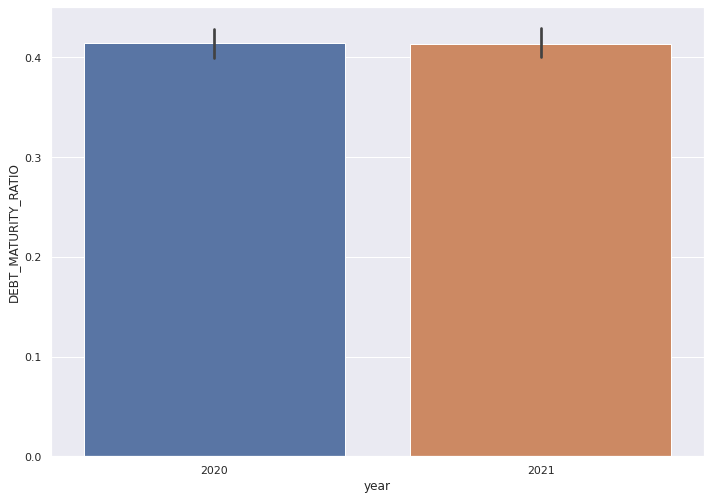

In [37]:
## maturity_hong dataset

import seaborn as sns

new_df_year = maturity_hong.loc[(maturity_hong['year'] == 2020) | (maturity_hong['year'] == 2021)]

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x="year",y="DEBT_MATURITY_RATIO",data=new_df_year)
plt.show()

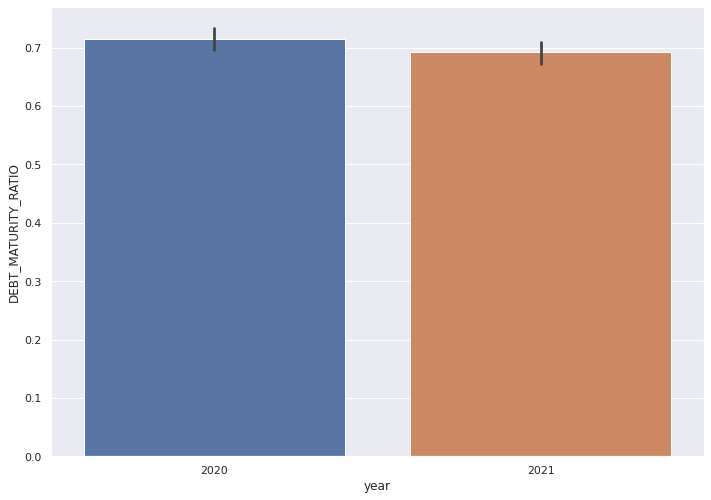

In [38]:
import seaborn as sns

new_df_year = maturity_australia.loc[(maturity_australia['year'] == 2020) | (maturity_australia['year'] == 2021)]

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x="year",y="DEBT_MATURITY_RATIO",data=new_df_year)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Maturity Ratio debt')

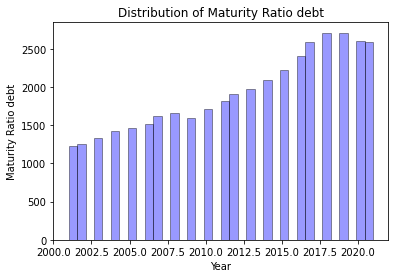

In [ ]:
new_df_year = new_df.loc[(new_df['year'] >= 2001) & (new_df['year'] <= 2021)]


# seaborn histogram
sns.distplot(new_df_year['year'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Maturity Ratio debt')
plt.xlabel('Year')
plt.ylabel('Maturity Ratio debt')

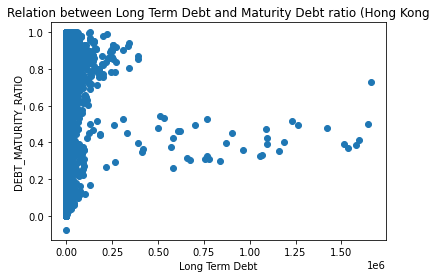

In [ ]:
## LT_DEBT and DEBT_MATURITY_RATIO

plt.scatter(x=maturity_hong['LT_DEBT'], y=maturity_hong['DEBT_MATURITY_RATIO'])
plt.title("Relation between Long Term Debt and Maturity Debt ratio (Hong Kong")
plt.ylabel("DEBT_MATURITY_RATIO")
plt.xlabel("Long Term Debt")
plt.show()

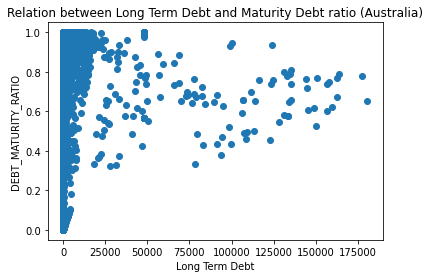

In [ ]:
## LT_DEBT and DEBT_MATURITY_RATIO

plt.scatter(x=maturity_australia['LT_DEBT'], y=maturity_australia['DEBT_MATURITY_RATIO'])
plt.title("Relation between Long Term Debt and Maturity Debt ratio (Australia)")
plt.ylabel("DEBT_MATURITY_RATIO")
plt.xlabel("Long Term Debt")
plt.show()

In [39]:
## Correlation Analysis between xtics and maturity ratio debt
print(new_df.corr())

                         year   ST_DEBT   LT_DEBT      NPPE  INTEREST  \
year                 1.000000  0.028983  0.044153  0.045159  0.058241   
ST_DEBT              0.028983  1.000000  0.861445  0.147306  0.630596   
LT_DEBT              0.044153  0.861445  1.000000  0.259673  0.671024   
NPPE                 0.045159  0.147306  0.259673  1.000000  0.229748   
INTEREST             0.058241  0.630596  0.671024  0.229748  1.000000   
EBIT                 0.039530  0.566291  0.618631  0.593386  0.557720   
EBITDA               0.042820  0.442083  0.501748  0.740129  0.460343   
CASH                 0.046643  0.125401  0.186988  0.348580  0.304392   
TA_USD               0.023346  0.859128  0.804853  0.190792  0.565391   
DIVIDEND             0.025768  0.518502  0.529897  0.614242  0.413585   
NATION               0.123993  0.041164  0.054370  0.073290  0.064454   
T_DEBT               0.036347  0.977173  0.949671  0.199487  0.669663   
DEBT_MATURITY_RATIO -0.001140 -0.038844  0.058354  

In [71]:
##  linear regressions to quantify the relation between debt maturity and these characteristics

# ## maturity_australia dataset

# print(maturity_australia['DEBT_MATURITY_RATIO'].dtype)

maturity_australia['DEBT_MATURITY_RATIO'].fillna(value=maturity_australia['DEBT_MATURITY_RATIO'].mean(), inplace=True)

# maturity_australia['DEBT_MATURITY_RATIO'].isnull().values.any()

# x = maturity_australia['DEBT_MATURITY_RATIO']


import statsmodels.api as sm

#define response variable
y = maturity_australia['EBITDA'].values.reshape(-1, 1)

#define predictor variables
X = maturity_australia['DEBT_MATURITY_RATIO'].values.reshape(-1, 1)


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05146
Date:                Wed, 16 Nov 2022   Prob (F-statistic):              0.821
Time:                        23:58:22   Log-Likelihood:            -1.4259e+05
No. Observations:               15000   AIC:                         2.852e+05
Df Residuals:                   14998   BIC:                         2.852e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1037.0103    

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:
##  linear regressions to quantify the relation between debt maturity and these characteristics

# ## maturity_hong dataset

import statsmodels.api as sm

maturity_hong['DEBT_MATURITY_RATIO'].fillna(value=maturity_hong['DEBT_MATURITY_RATIO'].mean(), inplace=True)

#define response variable
y = maturity_hong['EBITDA'].values.reshape(-1, 1)

#define predictor variables
X = maturity_hong['DEBT_MATURITY_RATIO'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4)


#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

#Prediction of test set
y_pred_mlr= mlr.predict(X_test)


Intercept:  [0.]
Coefficients:


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [111]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 100.00
Mean Absolute Error: 6.049941358925035e-13
Mean Square Error: 1.8033562135576928e-23
Root Mean Square Error: 4.246594180702569e-12


In [69]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

y = maturity_australia['EBITDA'].values.reshape(-1, 1)
X = maturity_australia['DEBT_MATURITY_RATIO'].values.reshape(-1, 1)


regr = linear_model.LinearRegression()
regr.fit(X , y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


x = sm.add_constant(x) 
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)



Intercept: 
 [1037.01026088]
Coefficients: 
 [[-17.81853776]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05146
Date:                Wed, 16 Nov 2022   Prob (F-statistic):              0.821
Time:                        23:55:55   Log-Likelihood:            -1.4259e+05
No. Observations:               15000   AIC:                         2.852e+05
Df Residuals:                   14998   BIC:                         2.852e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
##  linear regressions to quantify the relation between debt maturity and these characteristics

# ## maturity_australia dataset

import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

y = maturity_australia['EBITDA'].values.reshape(-1, 1)
X = maturity_australia['DEBT_MATURITY_RATIO'].values.reshape(-1, 1)


maturity_australia['DEBT_MATURITY_RATIO'].fillna(value=maturity_australia['DEBT_MATURITY_RATIO'].mean(), inplace=True)

#define response variable
y = maturity_australia['EBITDA'].values.reshape(-1, 1)

#define predictor variables
X = maturity_australia['DEBT_MATURITY_RATIO'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)


#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

#Prediction of test set
y_pred_mlr= mlr.predict(X_test)


Intercept:  [1027.34313209]
Coefficients:


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [115]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: -0.00
Mean Absolute Error: 1692.7061567473531
Mean Square Error: 9827481.768308828
Root Mean Square Error: 3134.8814600091064


In [92]:
## estimate a Machine Learning model and evaluate the predictive performance
##...Linear regression model(ML)
## For Australia  -- Use only 2021 data for this analysis
australia_year = maturity_australia.loc[(maturity_australia['year'] == 2021)]

# model will try to predict the debt maturity ratio of a firm

#define response variable
y = australia_year['DEBT_MATURITY_RATIO']

#define predictor variables
x = australia_year[['TA_USD', 'INTEREST', 'EBIT', 'EBITDA']]


# Import library for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4)

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

# Model evaluation
# Model prediction on train data
y_pred = lm.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.013494072433468784
Adjusted R^2: 0.006384119802358645
MAE: 0.2172824608827056
MSE: 0.07667858105063828
RMSE: 0.2769089761106315


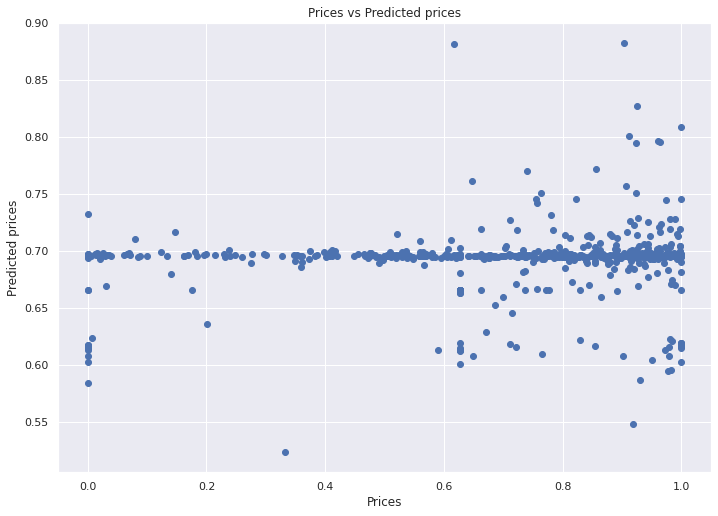

In [93]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Maturity ratio debt")
plt.ylabel("Predicted debt")
plt.title("Prices vs Predicted debt")
plt.show()

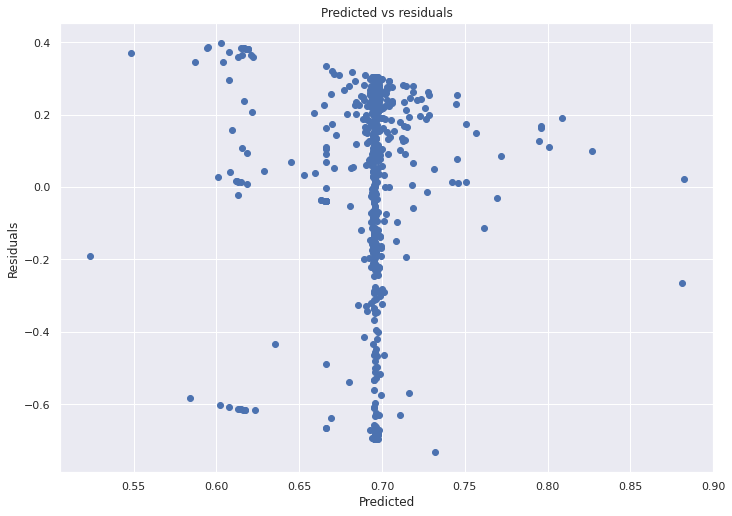

In [94]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## There is a pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is not satisfied

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


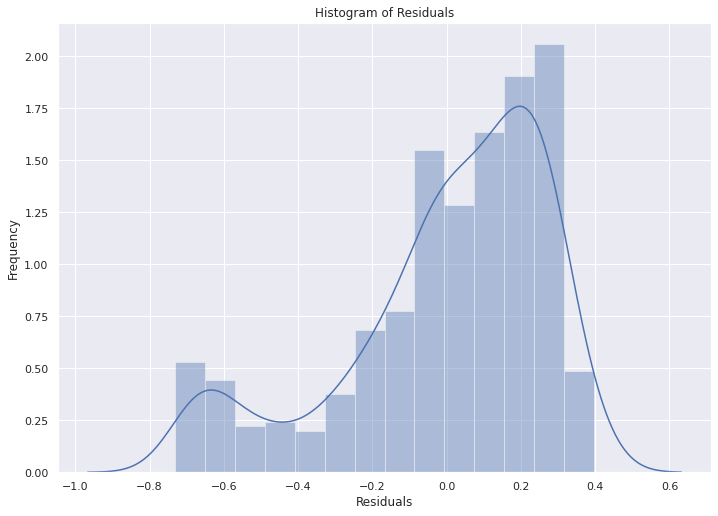

In [95]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Here the residuals are not normally distributed. So normality assumption is npt satisfied

In [97]:
## evaluate the model’s performance on the test dataset and interpret the results.
# using test data

# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

## Here the model evaluations scores are very different  with that of train data. So the model is overfitting.

R^2: -0.6118075040077968
Adjusted R^2: -0.6392425253526104
MAE: 0.22470094174145458
MSE: 0.11087896750167318
RMSE: 0.33298493584796474


In [98]:
## estimate a Machine Learning model and evaluate the predictive performance
##...Linear regression model(ML)
## For Hong Kong  -- Use only 2021 data for this analysis
hong_year = maturity_hong.loc[(maturity_hong['year'] == 2021)]

# model will try to predict the debt maturity ratio of a firm

#define response variable
y = maturity_hong['DEBT_MATURITY_RATIO']

#define predictor variables
x = maturity_hong[['TA_USD', 'INTEREST', 'EBIT', 'EBITDA']]


# Import library for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4)

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

# Model evaluation
# Model prediction on train data
y_pred = lm.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.01832981121665367
Adjusted R^2: 0.01810927312313304
MAE: 0.27602872680166407
MSE: 0.10631002331835404
RMSE: 0.3260521788277975


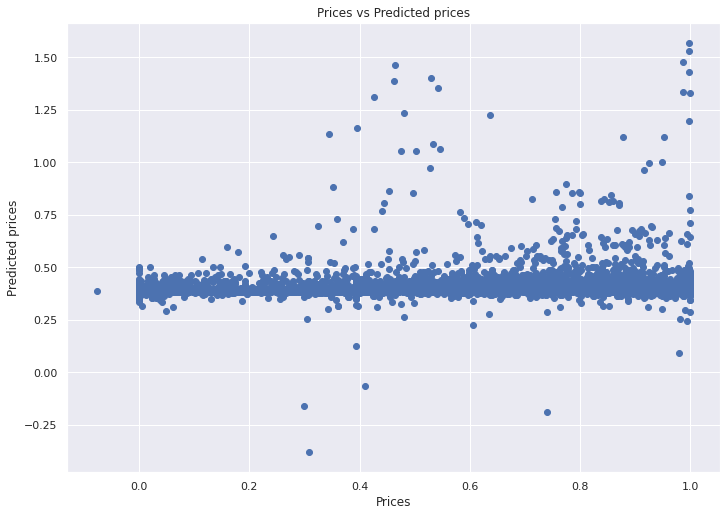

In [100]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Maturity ratio debt")
plt.ylabel("Predicted debt")
plt.title("Prices vs Predicted debt")
plt.show()

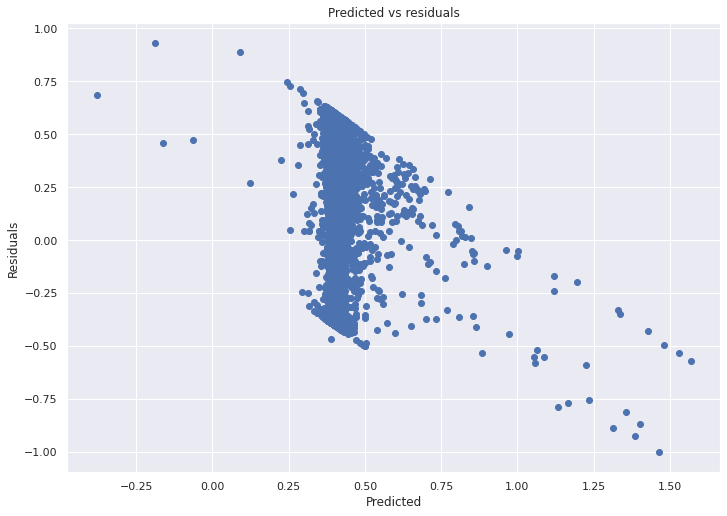

In [101]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


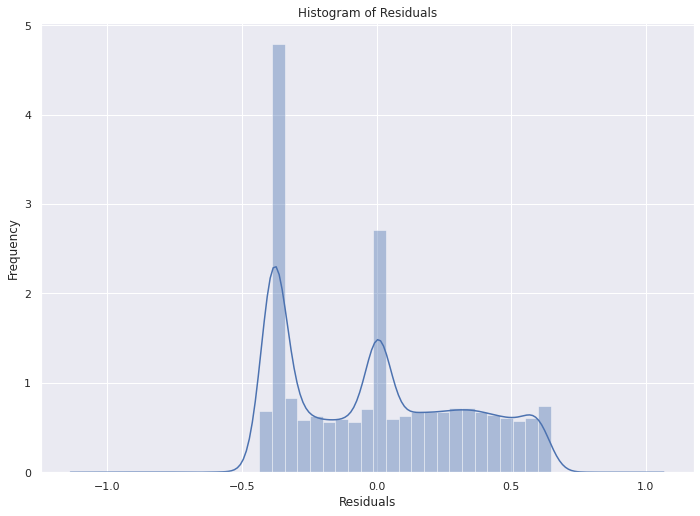

In [102]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Here the residuals are not normally distributed. So normality assumption is npt satisfied

In [103]:
## evaluate the model’s performance on the test dataset and interpret the results.
# using test data

# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

## Here the model evaluations scores are close almost  with that of train data. So the model is not overfitting.

R^2: 0.012711045087135164
Adjusted R^2: 0.012193394566798132
MAE: 0.2782793092688768
MSE: 0.10787987247471964
RMSE: 0.32845071544254495


In [125]:
!cp content/drive/MyDrive/Resit_Final_Project.ipynb./

cp: missing destination file operand after 'content/drive/MyDrive/Resit_Final_Project.ipynb./'
Try 'cp --help' for more information.


In [127]:
!jupyter nbconvert --to PDF "Resit_Final_Project.ipynb"

[NbConvertApp] WARNING | pattern 'Resit_Final_Project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exe